# Dynamic height from satellite observation

In [1]:
# this version uses xarray package
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr

In [2]:
# get SSH from AVISO satellite
# read in netCDF
df=xr.open_dataset('zos_AVISO_L4_clim.nc')
df# shows the name of variables

<xarray.Dataset>
Dimensions:    (time: 12, bnds: 2, lon: 360, lat: 180)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-16T12:00:00 ... 2010-12-16T12:00:00
  * lon        (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 356.5 357.5 358.5 359.5
  * lat        (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 86.5 87.5 88.5 89.5
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lon_bnds   (lon, bnds) float64 ...
    lat_bnds   (lat, bnds) float64 ...
    zos        (time, lat, lon) float32 ...
Attributes: (12/30)
    CDI:                 Climate Data Interface version 1.9.9 (https://mpimet...
    Conventions:         CF-1.4
    source:              SSALTO/DUACS
    institution:         Centre National d'Etudes Spatiales
    institute_id:        CNES
    experiment_id:       obs
    ...                  ...
    project_id:          obs4MIPs
    table_id:            Table Omon_obs (31 January 2011) 3852a2b3aff8bddd40f...
    title:               Obs-AVISO model output prepared for obs4MIPs NASA-JP...
    modeling_realm:      ocean
    cmor_version:        2.5.3
    CDO:                 Climate Data Operators version 1.9.9 (https://mpimet...

In [3]:
lat=df['lat']
lon=df['lon']
zos=df['zos']
ssh0=np.mean(zos,axis=0)

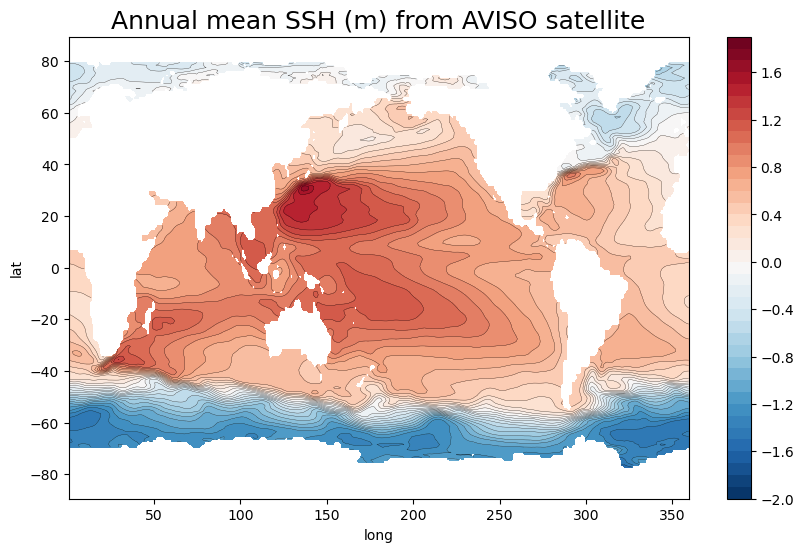

In [4]:
# plot surface dynamic height wrt 2000 dbar
plt.figure(figsize=(10,6))
cnt=np.arange(-2,2,.1)
plt.contourf(lon,lat,ssh0,cnt,cmap='RdBu_r')
plt.colorbar()
plt.contour(lon,lat,ssh0,cnt,linestyles='solid',colors='k',linewidths=.2)
plt.xlabel('long')
plt.ylabel('lat')
plt.title('Annual mean SSH (m) from AVISO satellite',fontsize=18)
plt.show()